In [1]:
#!pip install yfinance
#import yfinance as yf
#!pip install mplfinance
#!pip install pytorch-
#!pip install pandas_ta
#! pip install statsforecast s3fs datasetsforecast
#!pip install git+https://github.com/Nixtla/neuralforecast.git@main

In [ ]:
import io
import os
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import yfinance as yf
from ohlcv import fetch_data

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Data Collection

Selecting the most representative companies of the Sharing Economy, Digital Nomad services and DePIN categories.

### Stock companies

In [ ]:
# creating a list of 15 nasdaq-listed companies from the p2p economy, sharing economy, digital nomad services
nasdaq15 = [
    "UBER",
    "ABNB", #airbnb
    "LYFT",
    "EXPE", #expedia
    "TASK", #taskus
    "TRIP", #tripadvisor
    "YELP",
    "FVRR", #Fiverr
    "DASH", #DoorDash
    "UPWK", #Upwork
    "YNDX", #yandex
    "ZM",   #Zoom
    "DOCU", #DocuSign
    "TEAM", #atlasian (trello, jira, confluence... remote work solutions)
    "DBX" #DropBox
]
len(nasdaq15)

15

In [ ]:
# Creating an empty DataFrame to store the concatenated data
data = pd.DataFrame(columns=['Company', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

# Looping over the list of companies
for company in nasdaq15:
    # Downloading historical data for each company for the last 18 months
    company_data = yf.download(company, start="2021-08-14", end="2024-04-30")

    # Resetting index and adding a 'Company' column
    company_data.reset_index(inplace=True)
    company_data['Company'] = company

    # Concatenating data to the main DataFrame
    data = pd.concat([data, company_data])

# Resetting index of the concatenated DataFrame
data.reset_index(drop=True, inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
print(data['Company'].unique())
print(len(data['Company'].unique()))

['UBER' 'ABNB' 'LYFT' 'EXPE' 'TASK' 'TRIP' 'YELP' 'FVRR' 'DASH' 'UPWK'
 'YNDX' 'ZM' 'DOCU' 'TEAM' 'DBX']
15


In [ ]:
data['Company'].value_counts()

Company
UBER    680
ABNB    680
LYFT    680
EXPE    680
TASK    680
TRIP    680
YELP    680
FVRR    680
DASH    680
UPWK    680
YNDX    680
ZM      680
DOCU    680
TEAM    680
DBX     680
Name: count, dtype: int64

In [ ]:
#save dataset
data.to_csv('nasdaq15.csv', index=False)

In [ ]:
#download dataset
files.download('nasdaq15.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Crypto companies

In [ ]:
# top 5 DePIN Coins by market cap https://www.coingecko.com/en/categories/depin
depin5 = [
    "FIL",
    "AR",
    "RNDR",
    "GRT",
    "THETA"
]
len(depin5)

5

In [ ]:
data = pd.DataFrame(columns=['Company', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'])

for coin in depin5:
    coin_data = fetch_data(exchange='binance', symbol=f"{coin}/USDT", timeframe='1d', limit=1826)
    coin_data['Company'] = coin
    data = pd.concat([data, coin_data], ignore_index=True)

print(data.shape)

print(data.head())

print(coin_data['Company'].unique())

print(len(coin_data['Company'].unique()))

In [ ]:
#save dataset
data.to_csv('depin5.csv', index=False)

In [ ]:
#download dataset
files.download('depin5.csv')

#### Improve coin selection:
- Look at the composition method of the crix index. did they used bitcoin? we know all the crypto depends on it.
- filter the coins on their liquidity/trading volume. because if they are not traded or if their holding isn't distributed enough, they're not good indicators.

# Data Visualization

In [ ]:
nasdaq15.head()

,Company,Date,Open,High,Low,Close,Adj Close,Volume
0,UBER,2021-08-16,41.759998,41.790001,40.860001,41.500000,41.500000,19223500
1,UBER,2021-08-17,41.000000,41.480000,40.580002,41.000000,41.000000,20364400
2,UBER,2021-08-18,40.970001,41.529999,40.799999,40.880001,40.880001,13682300
3,UBER,2021-08-19,40.279999,40.599998,39.509998,39.860001,39.860001,22471400
4,UBER,2021-08-20,39.689999,40.080002,39.240002,39.950001,39.950001,18080700


In [ ]:
nasdaq15.columns = nasdaq15.columns.str.lower()
nasdaq15.head()

,company,date,open,high,low,close,adj close,volume
0,UBER,2021-08-16,41.759998,41.790001,40.860001,41.500000,41.500000,19223500
1,UBER,2021-08-17,41.000000,41.480000,40.580002,41.000000,41.000000,20364400
2,UBER,2021-08-18,40.970001,41.529999,40.799999,40.880001,40.880001,13682300
3,UBER,2021-08-19,40.279999,40.599998,39.509998,39.860001,39.860001,22471400
4,UBER,2021-08-20,39.689999,40.080002,39.240002,39.950001,39.950001,18080700


In [ ]:
depin5.head()

,date,open,high,low,close,volume,company
0,2021-08-14,74.47,75.00,69.99,72.40,2.873070e+06,FIL
1,2021-08-15,72.39,74.47,70.08,73.06,2.465723e+06,FIL
2,2021-08-16,73.06,75.89,72.42,73.26,3.224870e+06,FIL
3,2021-08-17,73.25,74.69,69.04,69.45,2.825487e+06,FIL
4,2021-08-18,69.49,70.15,66.00,67.47,2.552150e+06,FIL


In [ ]:
depin5.columns = depin5.columns.str.lower()
# reorganize depin columns order to match with nasdaq
depin5.insert(0,'company', depin5.pop('company'))
depin5.head()

,company,date,open,high,low,close,volume
0,FIL,2021-08-14,74.47,75.00,69.99,72.40,2.873070e+06
1,FIL,2021-08-15,72.39,74.47,70.08,73.06,2.465723e+06
2,FIL,2021-08-16,73.06,75.89,72.42,73.26,3.224870e+06
3,FIL,2021-08-17,73.25,74.69,69.04,69.45,2.825487e+06
4,FIL,2021-08-18,69.49,70.15,66.00,67.47,2.552150e+06


In [ ]:
print(depin5['date'].min())
print(depin5['date'].max())

2021-08-16
2024-04-29


In [ ]:
print(nasdaq15['date'].min())
print(nasdaq15['date'].max())

2021-08-16
2024-04-29


In [ ]:
# align both min & max dates (from 2021-08-16 to 2024-04-29)
depin5 = depin5[depin5['date'] >= '2021-08-16']
depin5 = depin5[depin5['date'] <= '2024-04-29']

In [ ]:
nasdaq15['company'].value_counts()

company
UBER    680
ABNB    680
LYFT    680
EXPE    680
TASK    680
TRIP    680
YELP    680
FVRR    680
DASH    680
UPWK    680
YNDX    680
ZM      680
DOCU    680
TEAM    680
DBX     680
Name: count, dtype: int64

In [ ]:
depin5['company'].value_counts()

company
FIL      988
AR       988
GRT      988
THETA    988
RNDR     885
Name: count, dtype: int64

In [ ]:
# Convert 'date' column to datetime
depin5['date'] = pd.to_datetime(depin5['date'])
nasdaq15['date'] = pd.to_datetime(nasdaq15['date'])

# Filter out non-business days
depin5 = depin5[depin5['date'].dt.dayofweek < 5]
nasdaq15 = nasdaq15[nasdaq15['date'].dt.dayofweek < 5]

# Remove the hour to keep only date data
depin5['date'] = depin5['date'].dt.date
nasdaq15['date'] = nasdaq15['date'].dt.date

# Reset index
depin5.reset_index(drop=True, inplace=True)
nasdaq15.reset_index(drop=True, inplace=True)

print(nasdaq15['date'].nunique())
print(depin5['date'].nunique())

706
680


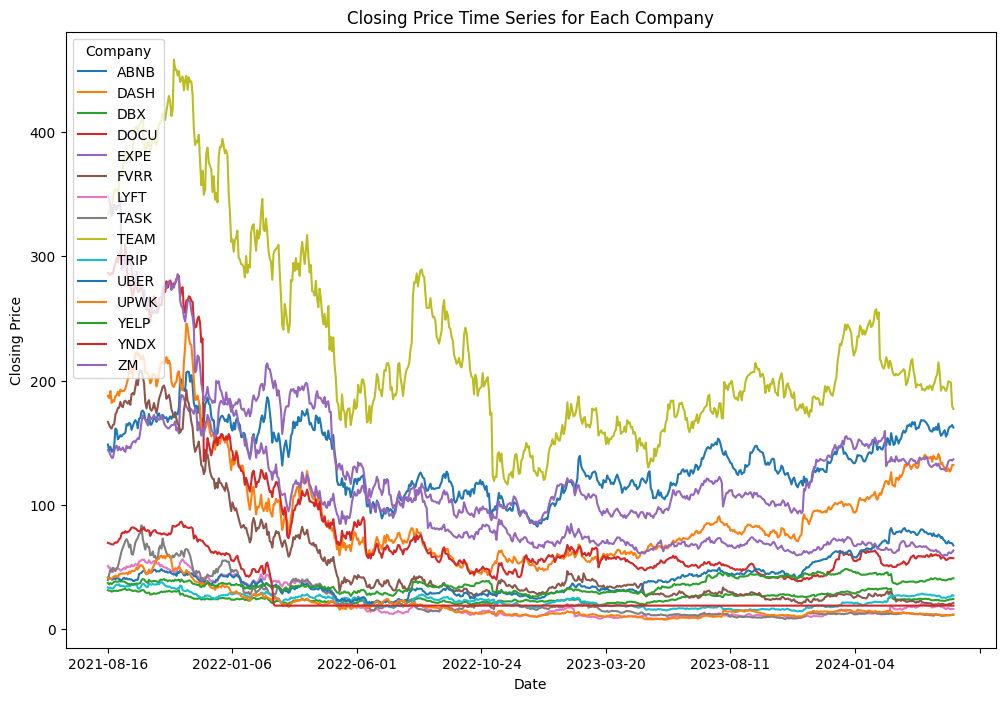

In [ ]:
# plot the nasdaq data.

# For each company, select the 'date' and 'close' columns and pivot the data
pivot_nasdaq15 = nasdaq15.pivot(index='date', columns='company', values='close')

# Plot the time series for each company
pivot_nasdaq15.plot(figsize=(12, 8))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Time Series for Each Company')

# Add legend
plt.legend(title='Company', loc='upper left')

# Show the plot
plt.show()

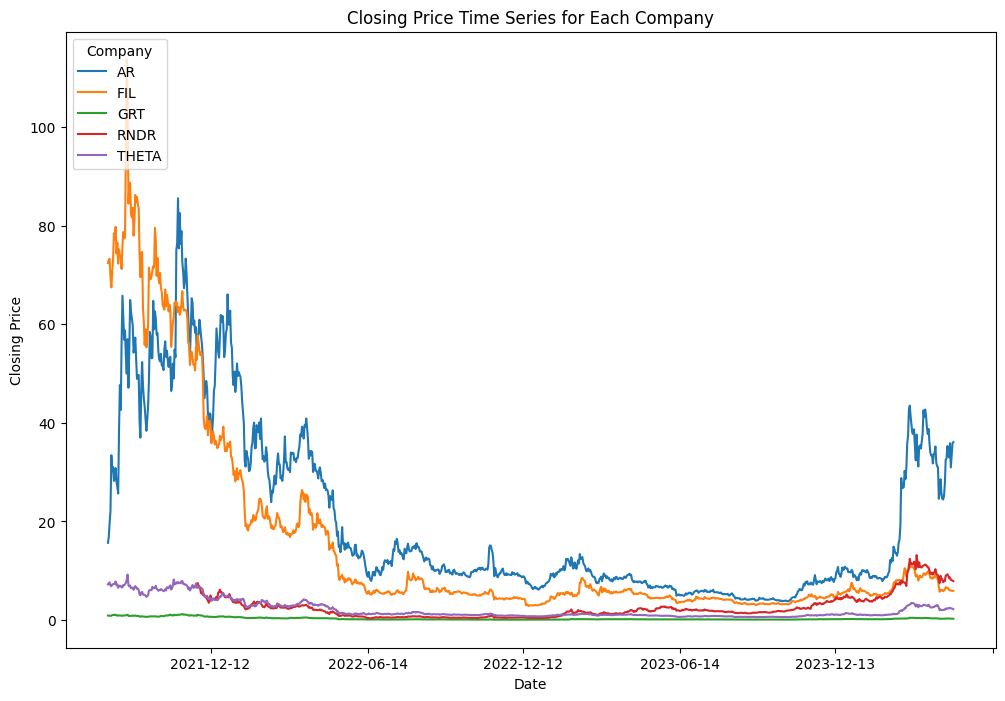

In [ ]:
# plot the crypto coins
plt.figure(figsize=(12, 8))

# Group the data by 'company' and iterate over each group
for company, group in depin5.groupby('company'):
    # Plot the time series for the current company
    plt.plot(group['date'], group['close'], label=company)

# Set the locator for x-axis to display every 6 months
plt.gca().xaxis.set_major_locator(MonthLocator(interval=6))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Time Series for Each Company')

# Add legend
plt.legend(title='Company', loc='upper left')

# Show the plot
plt.show()

In [ ]:
# drop 'adj close' from nasdaq

# merge dataframes
p2p20 = pd.concat([nasdaq15, depin5], ignore_index=True)
p2p20.shape

(13655, 8)

In [ ]:
print(p2p20['date'].min())
print(p2p20['date'].max())

2021-08-16 00:00:00
2024-04-29 00:00:00


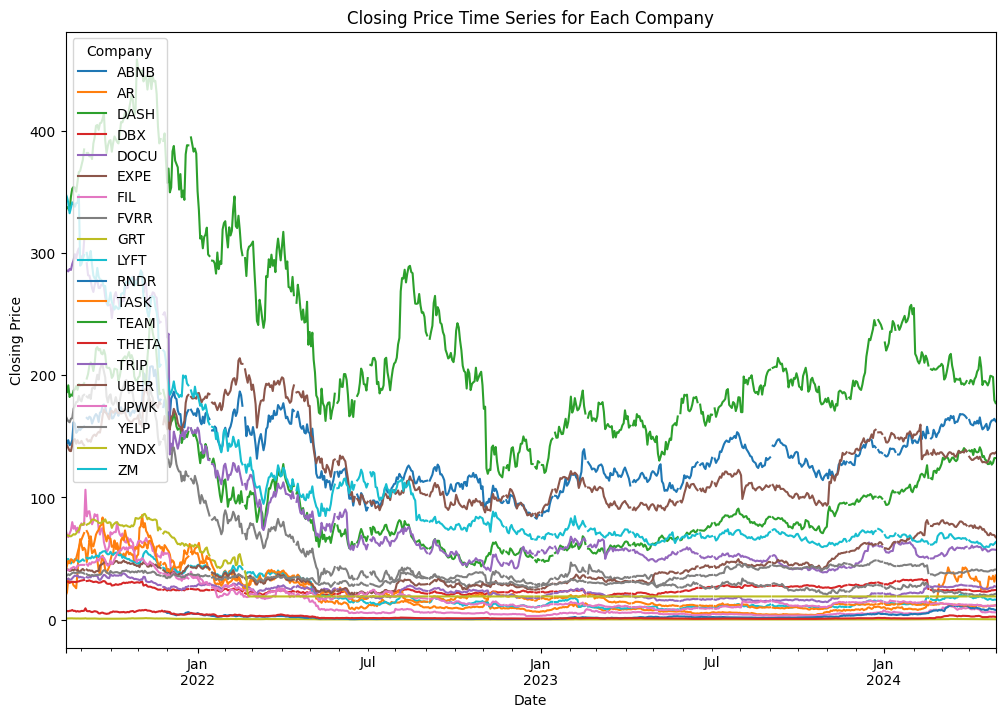

In [ ]:
# For each company, select the 'date' and 'close' columns and pivot the data
pivot_p2p20 = p2p20.pivot(index='date', columns='company', values='close')

# Plot the time series for each company
pivot_p2p20.plot(figsize=(12, 8))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Time Series for Each Company')

# Add legend
plt.legend(title='Company', loc='upper left')

# Show the plot
plt.show()

In [ ]:
# there are still some missing values (26) between nasdaq and crypto

In [ ]:
#save dataset
p2p20.to_csv('p2p20.csv', index=False)
files.download('p2p20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>